# Lineup a 1-D peak : scan detector *v* motor

From *2021-03 APS Python Training for Bluesky Data Acquisition*.

**Objective**

Line up a motor `m1` to a simulated diffraction peak `noisy`.

The `noisy` peak simulation (computed using EPICS PV `gp:userCalc1`) has these parameters:

parameter | description
:--- | :---
peak shape | Lorentzian as function of `m1.position`
center | randomly-placed between -1 .. +1
width | randomly-selected, at most 0.15 (motor units)
scale (height) | randomly-selected, between 10,000 .. 100,000 (counts)
counting noise| randomly-selected, between .01 .. .09 of scale (counts)

The calculation updates `noisy` when a new `m1.position` (`gp:m1.RBV`) value is reported to `gp:userCalc1`.

Since this detector is actually an EPICS calculation using the *swait* record, the concept of counting time was not built into the simulation.

Since we know the peak is somewhere between -1 .. +1, we can limit the scan range.  To ensure the scan crosses the peak, we increase the scan range a bit, to -2 .. 2.

Normally, we'd simulate a more narrow diffraction peak but the resolution of these motors is the limiting factor.

## Start the `instrument` package

In [1]:
from instrument.collection import *

I Wed-22:47:42 - ############################################################ startup
I Wed-22:47:42 - logging started
I Wed-22:47:42 - logging level = 10
I Wed-22:47:42 - /home/beams1/JEMIAN/Documents/projects/BCDA-APS/bluesky_instrument_training/instrument/collection.py
I Wed-22:47:42 - /home/beams1/JEMIAN/Documents/projects/BCDA-APS/bluesky_instrument_training/instrument/mpl/notebook.py


Activating auto-logging. Current session state plus future input saved.
Filename       : /home/beams1/JEMIAN/Documents/projects/BCDA-APS/bluesky_instrument_training/.logs/ipython_console.log
Mode           : rotate
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active


I Wed-22:47:43 - #### Bluesky Framework ####
I Wed-22:47:43 - /home/beams1/JEMIAN/Documents/projects/BCDA-APS/bluesky_instrument_training/instrument/framework/check_python.py
I Wed-22:47:43 - /home/beams1/JEMIAN/Documents/projects/BCDA-APS/bluesky_instrument_training/instrument/framework/check_bluesky.py
I Wed-22:47:47 - /home/beams1/JEMIAN/Documents/projects/BCDA-APS/bluesky_instrument_training/instrument/framework/initialize.py
I Wed-22:47:53 - using databroker catalog 'class_2021_03'
I Wed-22:47:53 - /home/beams1/JEMIAN/Documents/projects/BCDA-APS/bluesky_instrument_training/instrument/framework/metadata.py
I Wed-22:47:53 - #### Devices ####
I Wed-22:47:53 - /home/beams1/JEMIAN/Documents/projects/BCDA-APS/bluesky_instrument_training/instrument/devices/area_detector.py
I Wed-22:47:53 - /home/beams1/JEMIAN/Documents/projects/BCDA-APS/bluesky_instrument_training/instrument/devices/calculation_records.py
I Wed-22:47:57 - /home/beams1/JEMIAN/Documents/projects/BCDA-APS/bluesky_instrument

Let's also monitor the simulated temperature during these scans.

In [2]:
sd.monitors.append(temperature)

## 2-pass scan

Find the peak of noisy v. m1 in the range of +/- 2.  This is a 2 scan procedure.  First scan passes through the full range.  Second scan is centered on the peak and width of the first scan.

We know the peak of the simulated noisy detector is positioned somewhere between -1 to +1.  Overscan that range to find both sides of the peak.



Transient Scan ID: 42868     Time: 2021-02-24 22:48:00
Persistent Unique Scan ID: 'e6cbd6fa-eee9-4384-98ba-3e7f98c1c382'
New stream: 'baseline'
New stream: 'temperature_monitor'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         m1 |      noisy |
+-----------+------------+------------+------------+
|         1 | 22:48:02.9 |   -2.00000 |   44.47890 |
|         2 | 22:48:03.4 |   -1.81800 |   51.98010 |
|         3 | 22:48:03.9 |   -1.63600 |   61.64759 |
|         4 | 22:48:04.4 |   -1.45500 |   74.32507 |
|         5 | 22:48:04.9 |   -1.27300 |   89.87571 |
|         6 | 22:48:05.4 |   -1.09100 |  111.64273 |
|         7 | 22:48:05.9 |   -0.90900 |  146.06441 |
|         8 | 22:48:06.4 |   -0.72700 |  194.80704 |
|         9 | 22:48:06.9 |   -0.54500 |  270.60334 |
|        10 | 22:48:07.4 |   -0.36400 |  399.12840 |
|        11 | 22:48:07.9 |   -0.18200 |  673.56152 |
|        12 | 22:48:08.4 |    0.00000 | 1311.17397 |
|  

('e6cbd6fa-eee9-4384-98ba-3e7f98c1c382',
 '63c3087b-6426-4180-a718-5780428feaeb')

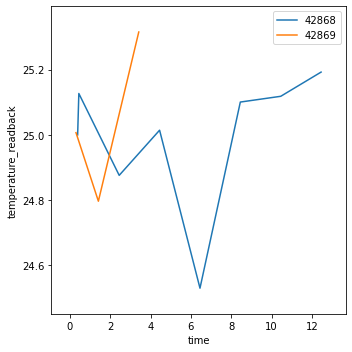

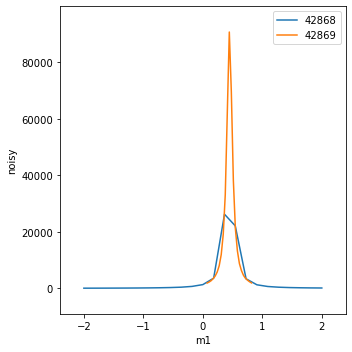

In [3]:
RE(two_pass_scan(md={"motive": "two_pass_scan"}))

## Multi-pass scan

Scan up to 4 times across the peak (in the same direction) starting 
with range of -2 .. +2, then reducing the range of the next scan 
based on the measured FWHM and centering on the measured center position (centroid).

After all scans are complete, report the computed peak centroid and FWHM for each scan in a table.  The motor will be positioned at the last centroid after the last scan.



Transient Scan ID: 42870     Time: 2021-02-24 22:48:24
Persistent Unique Scan ID: 'd83fee99-6d4e-4c62-ab64-af3ca280ade7'
New stream: 'baseline'
New stream: 'temperature_monitor'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         m1 |      noisy |
+-----------+------------+------------+------------+
|         1 | 22:48:27.0 |   -2.10000 |   41.40218 |
|         2 | 22:48:27.5 |   -1.90900 |   48.06769 |
|         3 | 22:48:28.0 |   -1.71800 |   56.71098 |
|         4 | 22:48:28.5 |   -1.52700 |   67.88070 |
|         5 | 22:48:29.1 |   -1.33600 |   83.10015 |
|         6 | 22:48:29.6 |   -1.14500 |  106.10589 |
|         7 | 22:48:30.1 |   -0.95500 |  134.82004 |
|         8 | 22:48:30.6 |   -0.76400 |  181.33494 |
|         9 | 22:48:31.1 |   -0.57300 |  258.00204 |
|        10 | 22:48:31.6 |   -0.38200 |  389.69795 |
|        11 | 22:48:32.1 |   -0.19100 |  642.88050 |
|        12 | 22:48:32.6 |    0.00000 | 1295.28633 |
|  

I Wed-22:48:59 - iterative results:
======= =================== ===================
scan_id center              FWHM               
======= =================== ===================
42870   0.40955951720930117 0.26893778270776014
42871   0.44889490701538126 0.11196925987226303
42872   0.4484629082704054  0.09827331635753478
42873   0.4486234929605656  0.09705372768802673
======= =================== ===================



m1 now at 0.4490


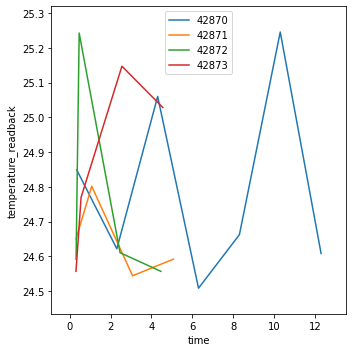

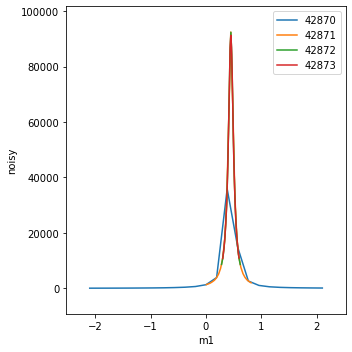

In [4]:
RE(findpeak_multipass(md={"motive": "findpeak_multipass"}))
print(f"{m1.name} now at {m1.position:.4f}")

Show how to re-plot the data from the database `db`.  The measured data is always in the `primary` stream.

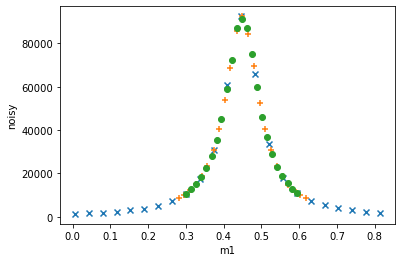

In [5]:
db.v2[-3].primary.read().plot.scatter(x="m1", y="noisy", marker="x")
db.v2[-2].primary.read().plot.scatter(x="m1", y="noisy", marker="+")
db.v2[-1].primary.read().plot.scatter(x="m1", y="noisy", marker="o")

Plot the monitored temperature *v* time.  (See the table of data printed during the scan, the `temperature_monitor` stream was listed near the top of the table.)

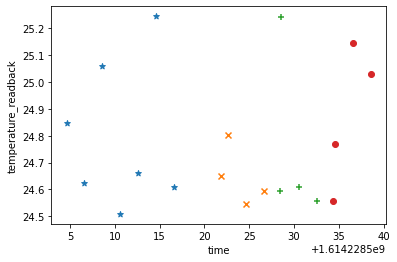

In [6]:
# temperature_monitor
db.v2[-4].temperature_monitor.read().plot.scatter(x="time", y="temperature_readback", marker="*")
db.v2[-3].temperature_monitor.read().plot.scatter(x="time", y="temperature_readback", marker="x")
db.v2[-2].temperature_monitor.read().plot.scatter(x="time", y="temperature_readback", marker="+")
db.v2[-1].temperature_monitor.read().plot.scatter(x="time", y="temperature_readback", marker="o")